<a href="https://colab.research.google.com/github/tetianashapoval/ShapovalPython/blob/main/python_practice_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
# cell for imports. All imports must go here.


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

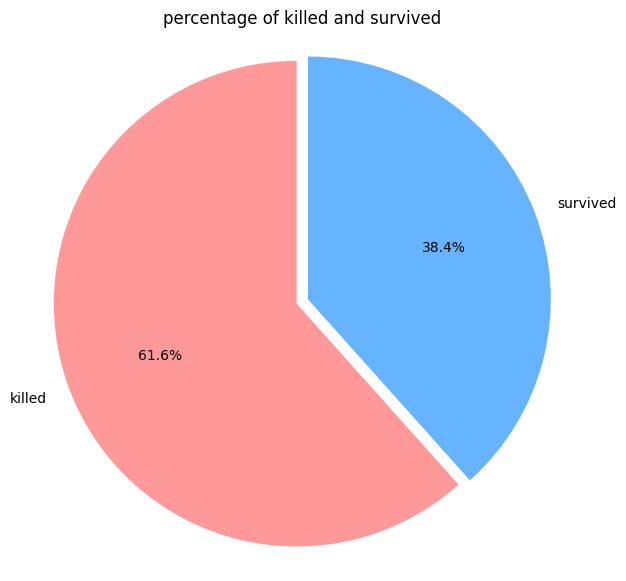

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("train.csv")
survival_counts = df['Survived'].value_counts()
labels = ['killed', 'survived']
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(7, 7))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title('percentage of killed and survived')
plt.axis('equal')
plt.show()

пайчарт показує, що вижила менша частина пасажирів, а конкретно 38.4 відсотків

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


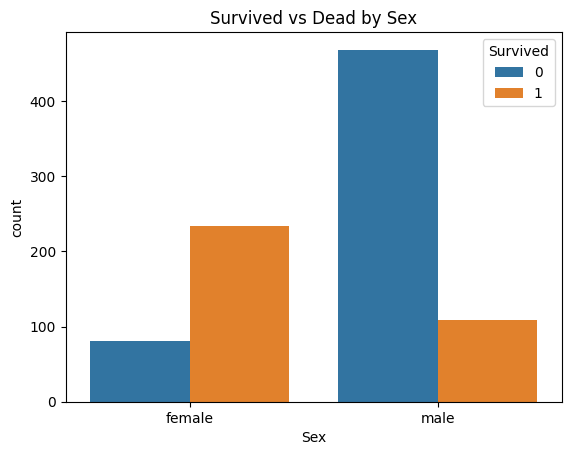

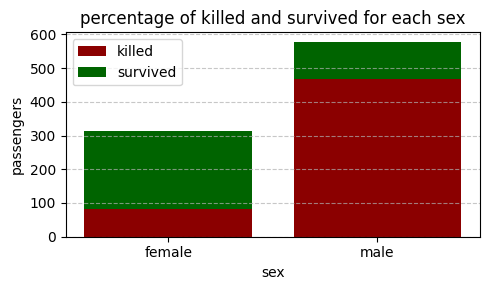

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
gender_survival = df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_survival.columns = ['Sex', 'Survived', 'Count']
plt.figure(figsize=(5, 3))
colors = ['#8B0000', '#006400']
for i, surv_status in enumerate([0, 1]):
    subset = gender_survival[gender_survival['Survived'] == surv_status]
    plt.bar(subset['Sex'], subset['Count'],
            bottom=gender_survival[gender_survival['Survived'] == 0]['Count'] if surv_status == 1 else None,
            label='survived' if surv_status == 1 else 'killed', color=colors[i])
plt.title('percentage of killed and survived for each sex')
plt.xlabel('sex')
plt.ylabel('passengers')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

з цього графіку видно, що серед жіночої статі виживших набагато більше. на титаніку по кількості переважали чоловіки, але вони ж і мають більший процент загиблих

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

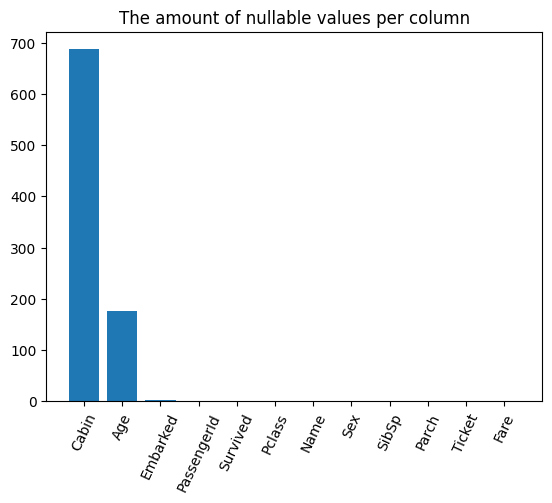

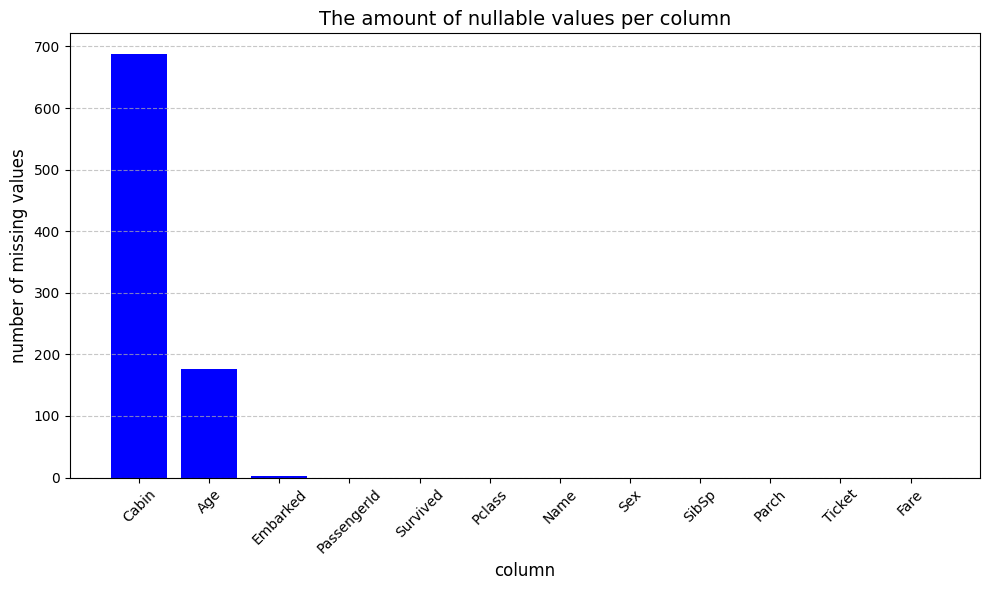

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
columns = ['Cabin', 'Age', 'Embarked', 'PassengerId', 'Survived',
                       'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare']
counts = df[columns].isnull().sum()
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='blue')
plt.title("The amount of nullable values per column", fontsize=14)
plt.xlabel("column", fontsize=12)
plt.ylabel("number of missing values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

цей графік показує, що найбільше пропущених значень у нас знаходяться у колонці номеру каюти в силу того, що це відбувалось давно та інфа про це, імовірно, втрачена, як і частково втрачена інформація про вік пасажирів



5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

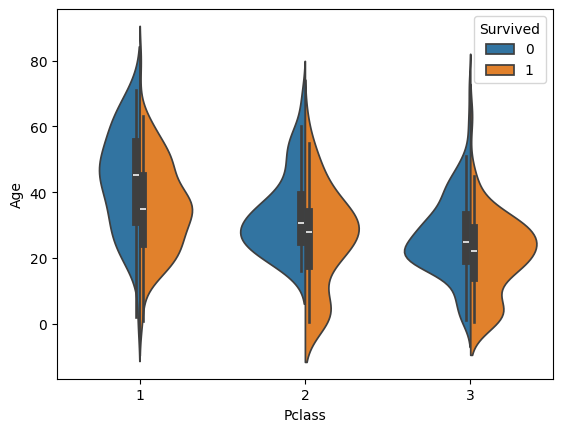

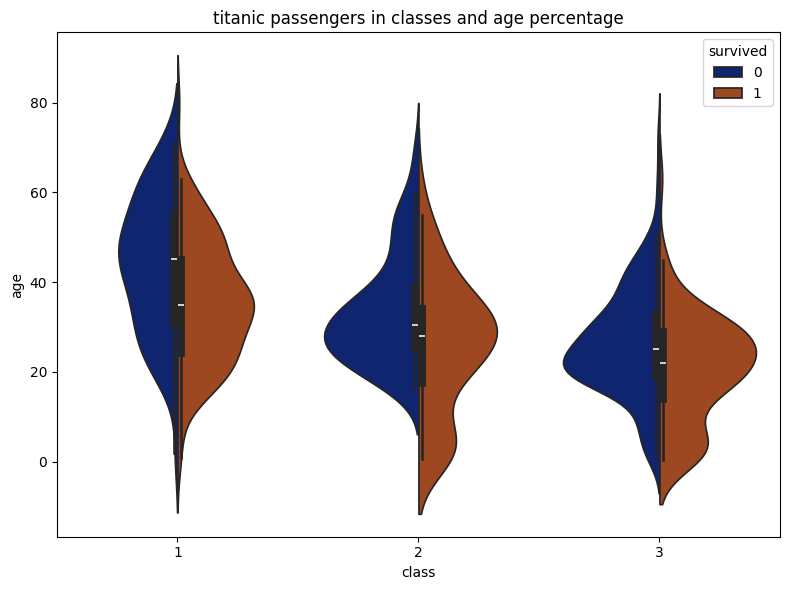

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
df = df.dropna(subset=['Age'])
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette='dark')
plt.title('titanic passengers in classes and age percentage')
plt.xlabel('class')
plt.ylabel('age')
plt.legend(title='survived')
plt.tight_layout()
plt.show()

тут ми бачимо розподіл пасажирів за віком на осі ординат та класом на осі абсцис за тим, вижили вони чи ні. в першому класі було більше виживших та загалом їхали старші люди, також набагато більше виживших серед дітей. в економ класі молодших та загиблих було на противагу більще першому

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


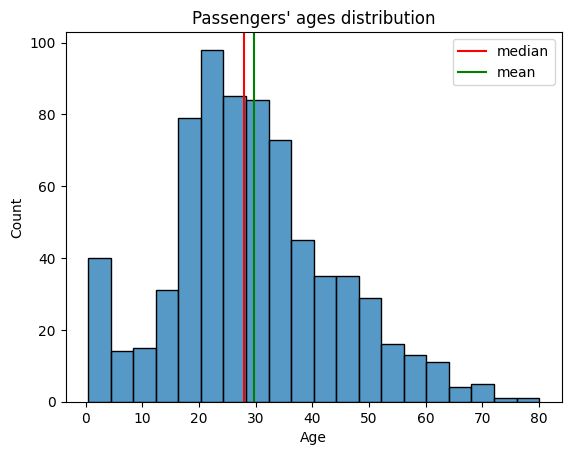

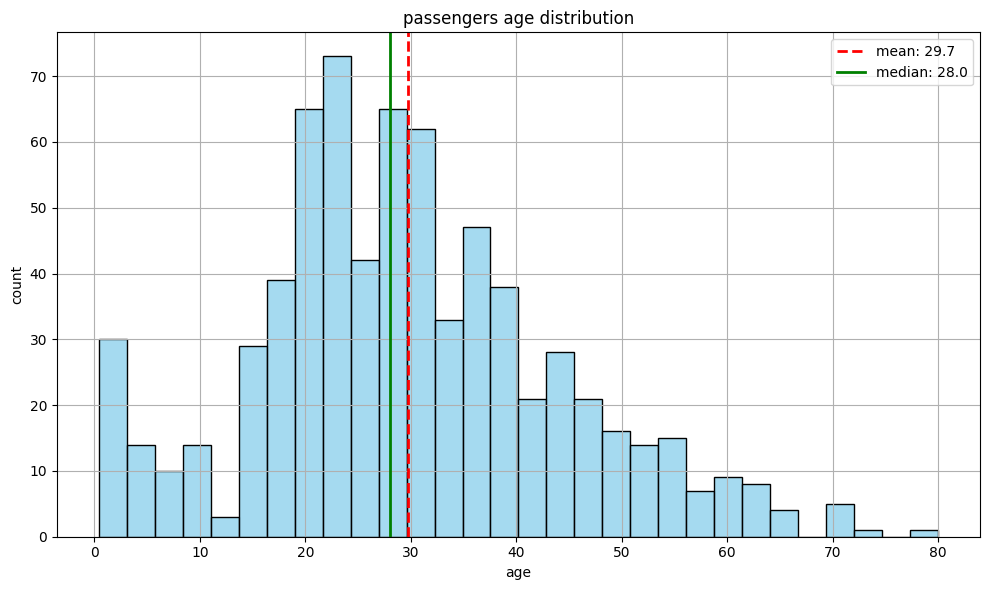

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
df = df.dropna(subset=['Age'])
median = df['Age'].median()
mean = df['Age'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=False, color='skyblue')
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'mean: {mean:.1f}')
plt.axvline(median, color='green', linestyle='-', linewidth=2, label=f'median: {median:.1f}')
plt.title('passengers age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

тут чисто розподіл віку пасажирів. червона лінія означає значення віку, а зелена медіану віку всіх

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

чи впливає кількість родичів у вигляді сіблінгів, батьків та дітей на виживання

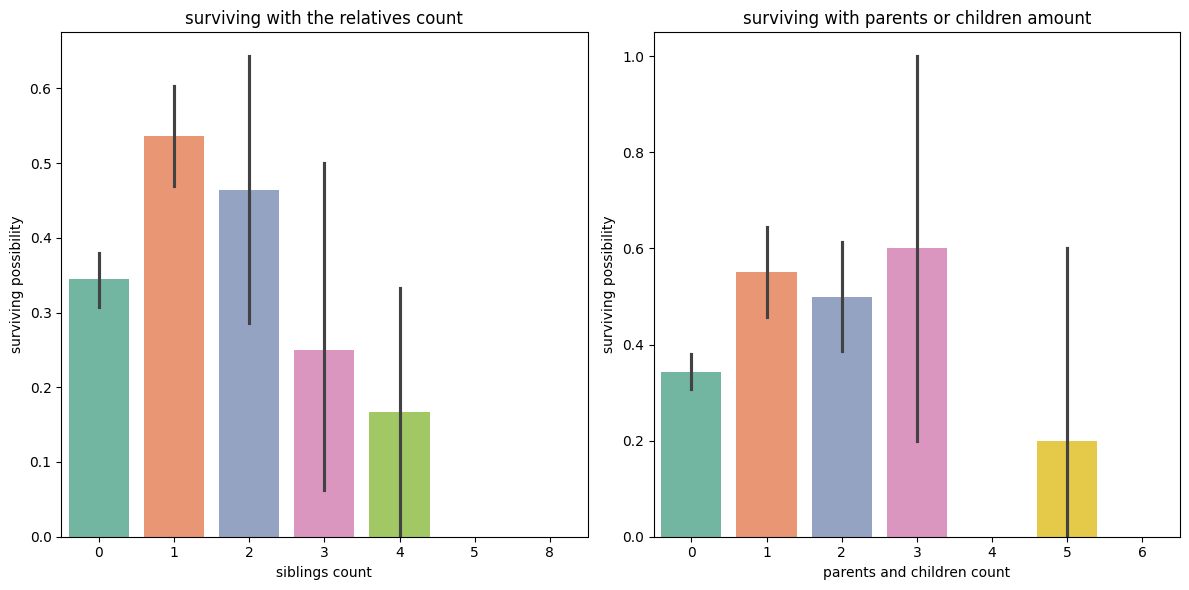

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='SibSp', y='Survived', data=df, hue='SibSp', palette='Set2', legend=False)
plt.title('surviving with the relatives count')
plt.xlabel('siblings count')
plt.ylabel('surviving possibility')
plt.subplot(1, 2, 2)
sns.barplot(x='Parch', y='Survived', data=df, hue='Parch', palette='Set2', legend=False)
plt.title('surviving with parents or children amount')
plt.xlabel('parents and children count')
plt.ylabel('surviving possibility')
plt.tight_layout()
plt.show()

графіки показують, що люди, у яких не було сіблінгів та батьків або дітей, мали менші шанси на виживання ніж ті, у кого були і ті, і ті, але якщо кількість родичів була супервелика, шанси на виживання також знижувались

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

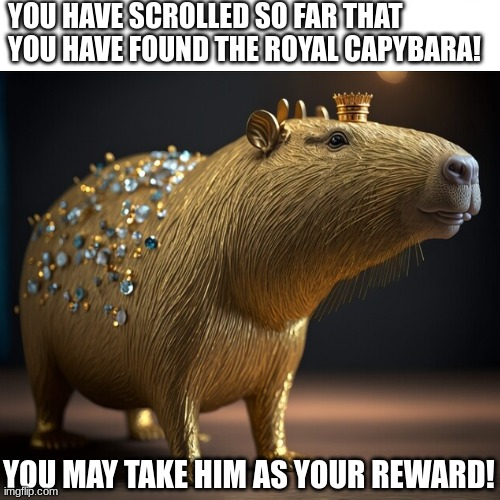